In [1]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE = 48
NUM_CLASSES = 7

In [13]:
def load_fer_data(csv_file):
    data = pd.read_csv(csv_file)
    # Get pixel values and labels
    pixels = data['pixels'].tolist()
    emotions = data['emotion'].values

    # Convert pixels from string to integers and reshape to 48x48
    X = []
    for pixel_sequence in pixels:
        pixel_array = np.array([int(pixel) for pixel in pixel_sequence.split()])
        X.append(pixel_array.reshape(48, 48, 1))  # Reshape each image to 48x48x1 (grayscale)

    X = np.array(X).astype('float32')
    y = to_categorical(emotions, num_classes=7)  # One-hot encode labels

    return X, y



In [15]:
X, y = load_fer_data('fer2013.csv')
X /= 255.0  # Normalize pixel values to [0, 1]


In [16]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [17]:
def create_cnn_model():
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 2nd Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 3rd Convolutional Layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the layers
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(7, activation='softmax'))  # 7 emotion classes

    return model


In [18]:
model = create_cnn_model()
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64)

# Save the trained model
model.save('emotion_detector_model.h5')


C:\Users\haris\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 69s 150ms/step - accuracy: 0.2388 - loss: 1.8262 - val_accuracy: 0.3282 - val_loss: 1.6229
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 75s 168ms/step - accuracy: 0.3841 - loss: 1.5774 - val_accuracy: 0.4480 - val_loss: 1.4056
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 64s 143ms/step - accuracy: 0.4568 - loss: 1.4079 - val_accuracy: 0.4918 - val_loss: 1.3606
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 72s 161ms/step - accuracy: 0.4992 - loss: 1.3192 - val_accuracy: 0.5113 - val_loss: 1.2770
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 86s 192ms/step - accuracy: 0.5328 - loss: 1.2434 - val_accuracy: 0.5442 - val_loss: 1.2169
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 65s 146ms/step - accuracy: 0.5541 - loss: 1.1935 - val_accuracy: 0.5528 - val_loss: 1.1910
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 67s 150ms/step - accuracy: 0.5724 - loss: 1.1393 - val_accuracy: 0.5522 - val_loss: 1.1806
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 70s 156ms/step - accuracy: 0.5826 - loss: 1

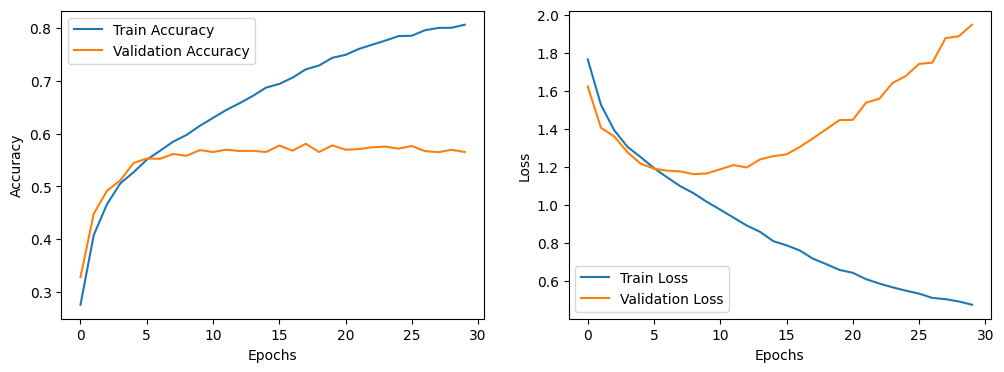

In [19]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)



In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.5747 - loss: 1.9141
Test Accuracy: 57.29%
